# Exploratory Data Analysis of the positive dataset before being processed through CD-HIT or MMSeqs2
Display graphs and plots (matplotlib)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read our positive dataset .csv file
df = pd.read_csv('PhageAcr_positive_dataset.csv') # Read our positive dataset .csv file

In [3]:
# Metrics for Sequence Size
print("min size:", df['Size'].min())                # Minimum of sequence size
print("max size:", df['Size'].max())                # Maximum of sequence size
print("mean:", int(round(df['Size'].mean(), 0)))    # Mean of sequence size
print("median:", int(df['Size'].median()))          # Median of sequence size
print("sd:", round(df['Size'].std(), 6))            # Standard Deviation of sequence size

min size: 47
max size: 528
mean: 125
median: 129
sd: 39.086594


In [4]:
# Defining an extra column "Genus"
df['Genus'] = df['Organism'].str.split().str[0]             # Extracts the Genus of the Organism species name
genus_counts = df['Genus'].value_counts().reset_index()     # Counts Genus occurrences
genus_counts.columns = ['Genus', 'Incidences']              # Renames columns

df_genus_incidences = genus_counts.sort_values(by='Genus').reset_index(drop=True) # Creates a new DataFrame with Genus and Incidences columns
df_genus_incidences

,Genus,Incidences
0,Absiella,1
1,Acetatifactor,1
2,Acetobacter,1
3,Acholeplasma,1
4,Achromobacter,2
...,...,...
260,Xanthomonas,5
261,Xenophilus,1
262,Xenorhabdus,9
263,Yersinia,15


In [5]:
df.head()

,ID,Sequence,Organism,Family,Type,Size,Protein Acr,Genus
0,RGB60049.1,MSIYTDMIPAILLVNDPQDSLSGAPIENYVKVSNINVAIYKNDSFK...,Absiella sp.,AcrIIA8,II-A,105,Yes,Absiella
1,WP_103240931.1,MSCPFQAMEGGNGMERKMALREFCGRYRKGDFKGTERAVQIEAGWY...,Acetatifactor muris,AcrIIA11,II-A,195,Yes,Acetatifactor
2,WP_086652143.1,MELIHTSDEVIKKIHKDGTFDTFLFFSASKYLAGSVASRKHYTYKI...,Acetobacter cibinongensis,AcrIF11,I-F,179,Yes,Acetobacter
3,WP_012242545.1,MEKQQLLKDLIQAFNSGSFESSDVKVQIKAGWYDWFCKDSSLKNKT...,Acholeplasma laidlawii,AcrIIA11,II-A,144,Yes,Acholeplasma
4,WP_062681378.1,MQLFHTSPSEISTITSTGRFGSFLFFSARAYTMTAGEALVYSLEID...,Achromobacter denitrificans,AcrIF11,I-F,150,Yes,Achromobacter


## Acr Protein Sequences that are above the typical Acr Protein size

In [6]:
## Check how many sequences have a size greater than 200
filtered_df = df[df['Size'] > 200].sort_values(by='Size')   # Filter rows where "Size" column is greater than 200

print(filtered_df.shape)
#filtered_df # Uncomment to display

(56, 8)


In [7]:
# Count number of Genera
df['Genus'].nunique()

265

## Frequency of Genera with sequences >200aa in size

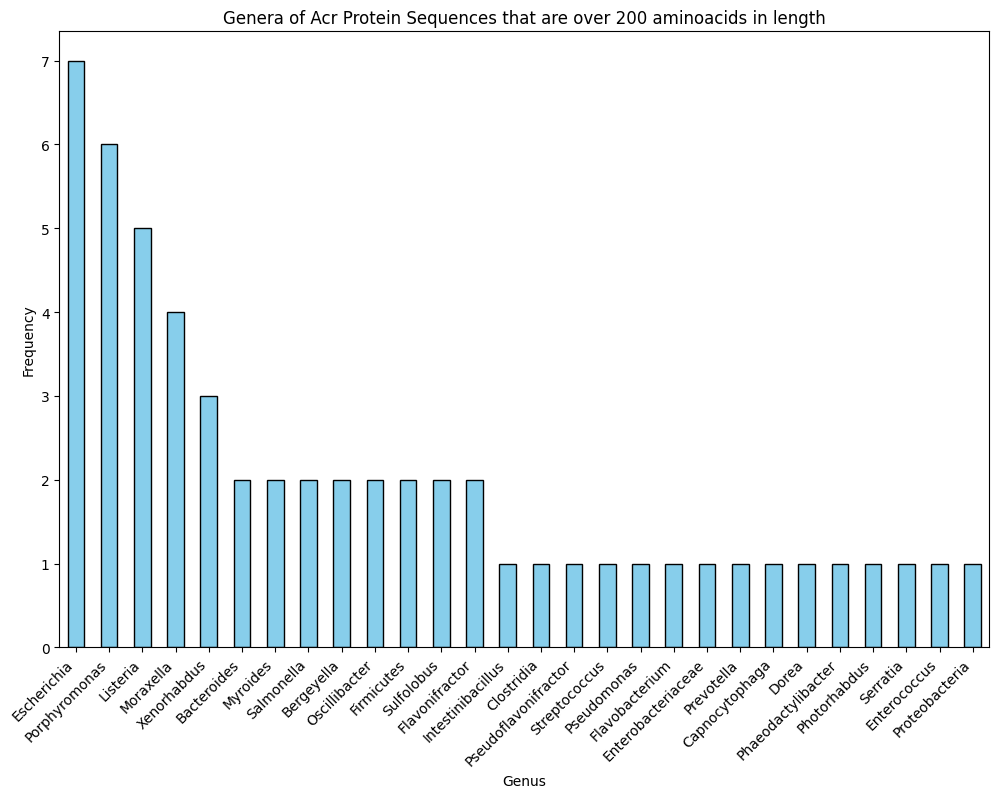

In [8]:
# Check most frequent Genera in this filtered dataframe
genus_counts = filtered_df['Genus'].value_counts()

plt.figure(figsize=(12, 8))
genus_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Genera of Acr Protein Sequences that are over 200 aminoacids in length')
plt.xlabel('Genus')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Protein Size by Genera (Top 53)
Top 53 because we have 265 genera (265 / 5 = 53)

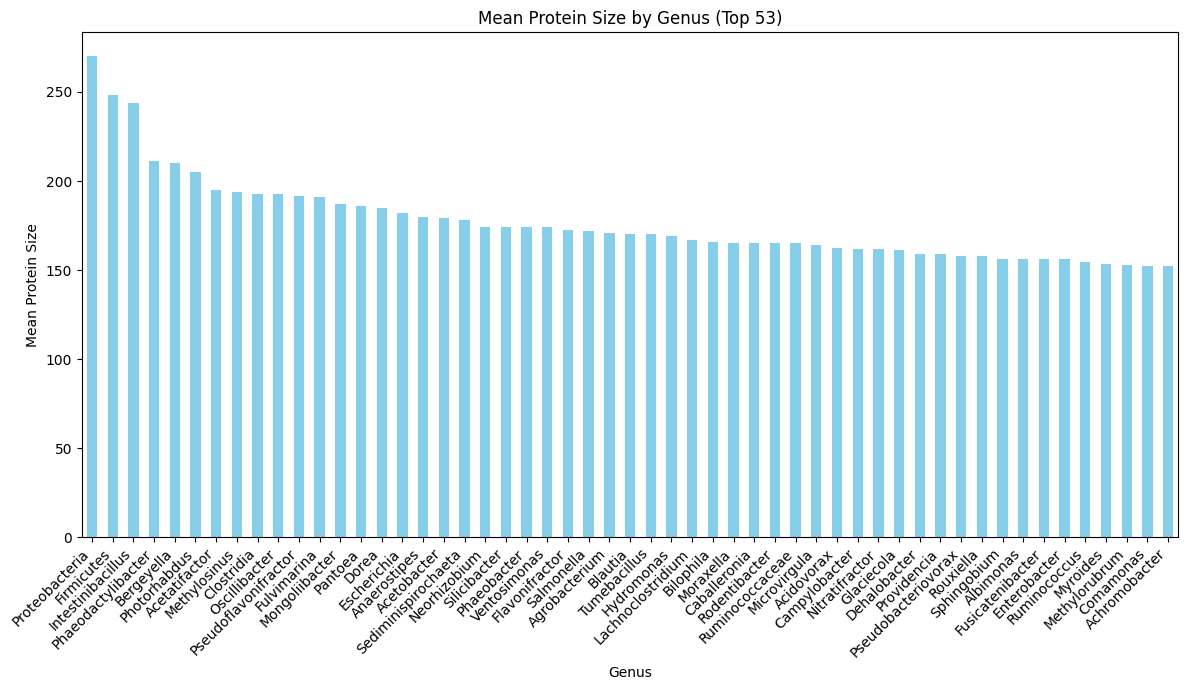

In [29]:
import matplotlib.pyplot as plt

# Grouping by 'Genus' and calculating mean protein size for each genus
genus_mean_size = df.groupby('Genus')['Size'].mean().sort_values(ascending=False)

# Selecting the top 53 genera
top_genus_mean_size = genus_mean_size.head(53)

# Creating a bar plot
plt.figure(figsize=(12, 7))
top_genus_mean_size.plot(kind='bar', color='skyblue')
plt.title('Mean Protein Size by Genus (Top 53)')
plt.xlabel('Genus')
plt.ylabel('Mean Protein Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Protein Size by Genera (Top 53) where Genera that occur less than 5 times are colored in red

The bars in orange represent the Genera which have less than 5 occurrences:


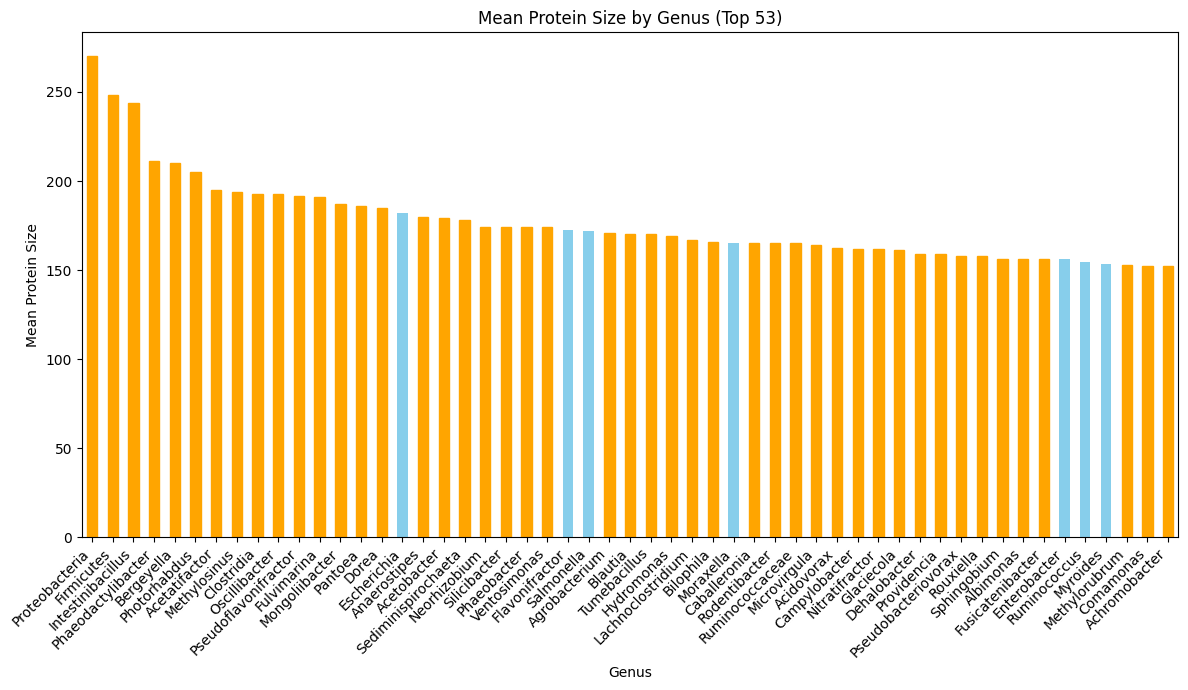

In [30]:
# Creating a bar plot
plt.figure(figsize=(12, 7))
bars = top_genus_mean_size.plot(kind='bar', color='skyblue')

# Color genera occurring less than 5 times in red
for bar in bars.patches:
    genus_name = top_genus_mean_size.index[bars.patches.index(bar)]
    if df['Genus'].value_counts()[genus_name] < 5:
        bar.set_color('orange')

print('The bars in orange represent the Genera which have less than 5 occurrences:')
plt.title('Mean Protein Size by Genus (Top 53)')
plt.xlabel('Genus')
plt.ylabel('Mean Protein Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Sequence Size by Genera that occur more than 5 times in the dataset (all cases)

The following is the average Sequence Size of ALL Genera that have more than 5 occurrences in the dataset:


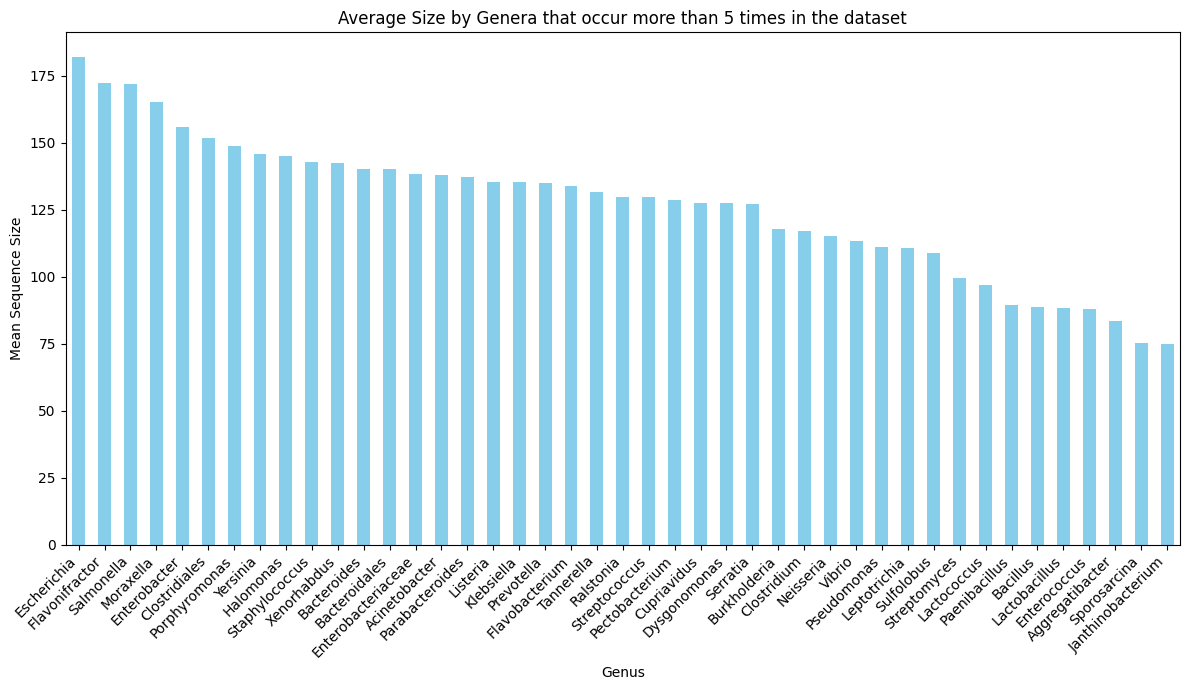

In [28]:
# Filter out genera with a frequency less than 5 counts
genus_counts = df['Genus'].value_counts()
valid_genus = genus_counts[genus_counts > 5].index
df_filtered = df[df['Genus'].isin(valid_genus)]

# Grouping by 'Genus' and calculating mean protein size for each genus
genus_mean_size = df_filtered.groupby('Genus')['Size'].mean().sort_values(ascending=False)

# Selecting all the genera
top_genus_mean_size = genus_mean_size.head(265)

# Creating a bar plot
print('The following is the average Sequence Size of ALL Genera that have more than 5 occurrences in the dataset:')
plt.figure(figsize=(12, 7))
top_genus_mean_size.plot(kind='bar', color='skyblue')
plt.title('Average Size by Genera that occur more than 5 times in the dataset')
plt.xlabel('Genus')
plt.ylabel('Mean Sequence Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Distribution of Sequence Sizes
Plot Type: Histogram
This plot will help us understand the distribution of the lengths of the Acr protein sequences.

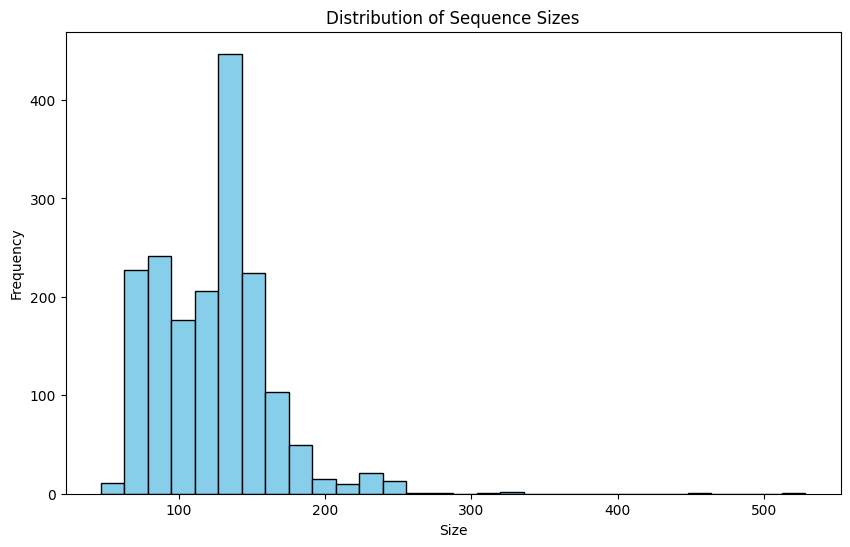

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Size'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sequence Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

# Frequency of Genera

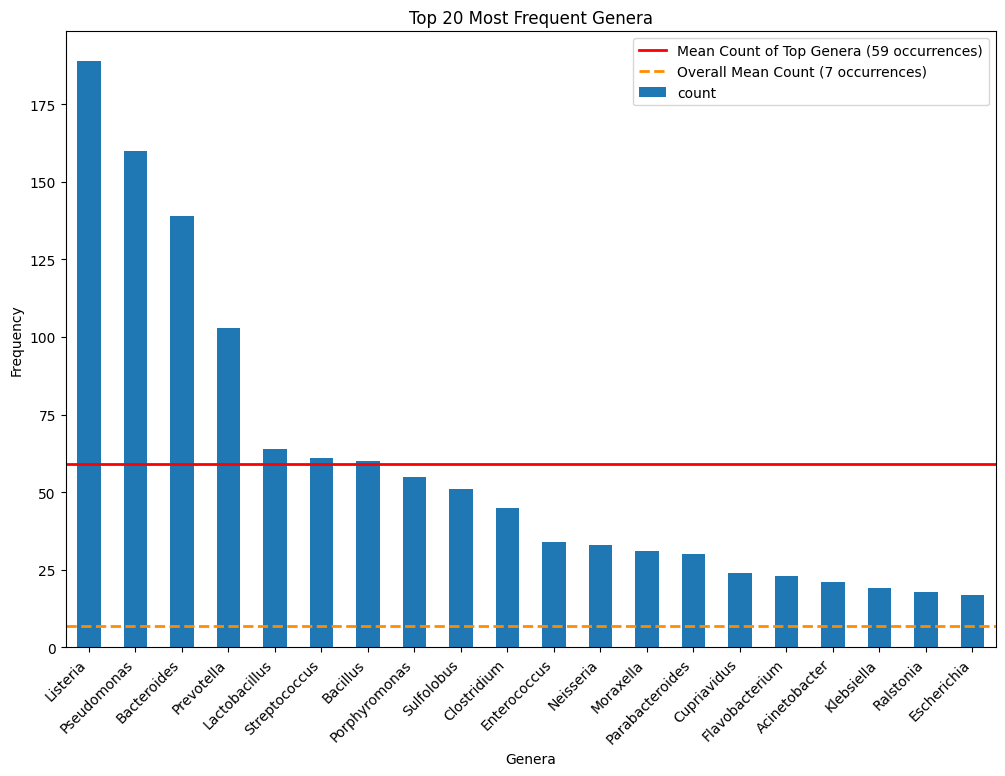

In [15]:
# Obtain gene counts
genus_counts = df['Genus'].value_counts()

# Get the top 20 most frequent genera
top_genera = genus_counts.head(20)

# Calculate the mean count of occurrences of all genera
overall_mean_count = round(genus_counts.mean())

# Calculate the mean count of occurrences of top genera
mean_count = round(top_genera.mean())

# Plot the data
plt.figure(figsize=(12, 8))
top_genera.plot(kind='bar')  # Use the default color for the bars
plt.axhline(y=mean_count, color='red', linestyle='-', linewidth=2, label=f'Mean Count of Top Genera ({mean_count} occurrences)')
plt.axhline(y=overall_mean_count, color='darkorange', linestyle='--', linewidth=2, label=f'Overall Mean Count ({overall_mean_count} occurrences)')
plt.title('Top 20 Most Frequent Genera')
plt.xlabel('Genera')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.legend()
plt.show()

# Sequence counts per Family

3. Number of Sequences per Family

Plot Type: Bar Chart

This plot will show the distribution of sequences across different families.

In [16]:
len(df['Family'].unique())

131

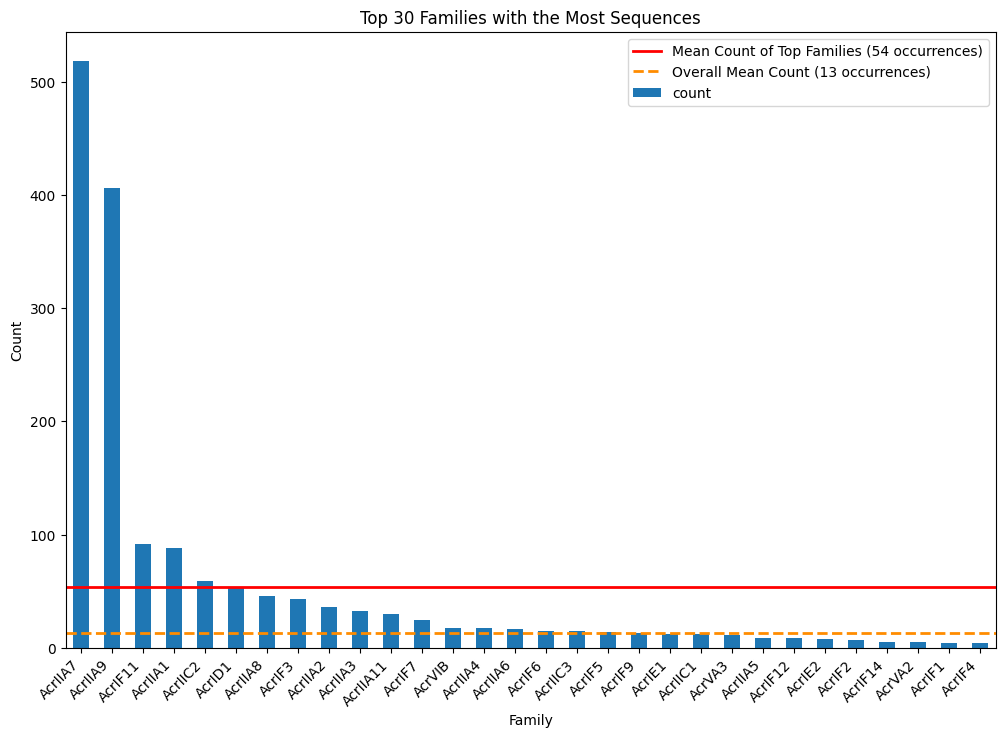

In [17]:
# Obtain Family counts
family_counts = df['Family'].value_counts()

# Get the top 20 most frequent genera
top_family = family_counts.head(30)

# Calculate the mean count of occurrences of all genera
overall_mean_count = round(family_counts.mean())

# Calculate the mean count of occurrences of top genera
mean_count = round(top_family.mean())

plt.figure(figsize=(12, 8))
df['Family'].value_counts().head(30).plot(kind='bar')
plt.axhline(y=mean_count, color='red', linestyle='-', linewidth=2, label=f'Mean Count of Top Families ({mean_count} occurrences)')
plt.axhline(y=overall_mean_count, color='darkorange', linestyle='--', linewidth=2, label=f'Overall Mean Count ({overall_mean_count} occurrences)')
plt.title('Top 30 Families with the Most Sequences')
plt.xlabel('Family')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.legend()
plt.show()


_________________
# Defunct plots
_________________

4. Sequence Size vs Family

Plot Type: Box Plot

This plot will help visualize the distribution of sequence sizes for each family.

<Figure size 1400x800 with 0 Axes>

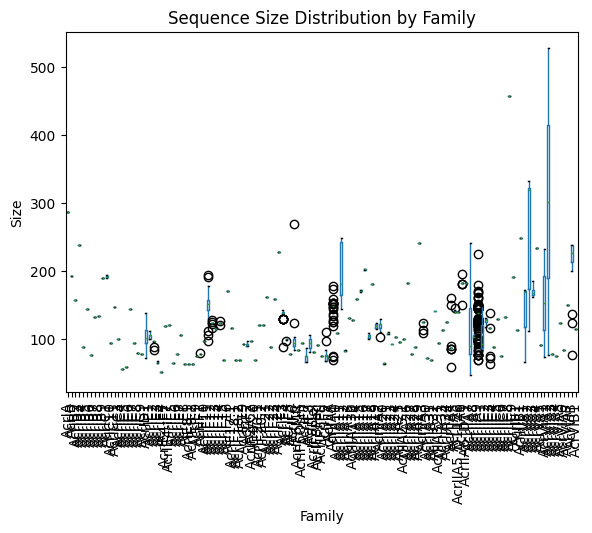

In [18]:
plt.figure(figsize=(14, 8))
df.boxplot(column='Size', by='Family', grid=False)
plt.title('Sequence Size Distribution by Family')
plt.suptitle('')
plt.xlabel('Family')
plt.ylabel('Size')
plt.xticks(rotation=90)
plt.show()

5. Number of Sequences per Genus

Plot Type: Bar Chart

This plot will show the number of Acr protein sequences for each genus.

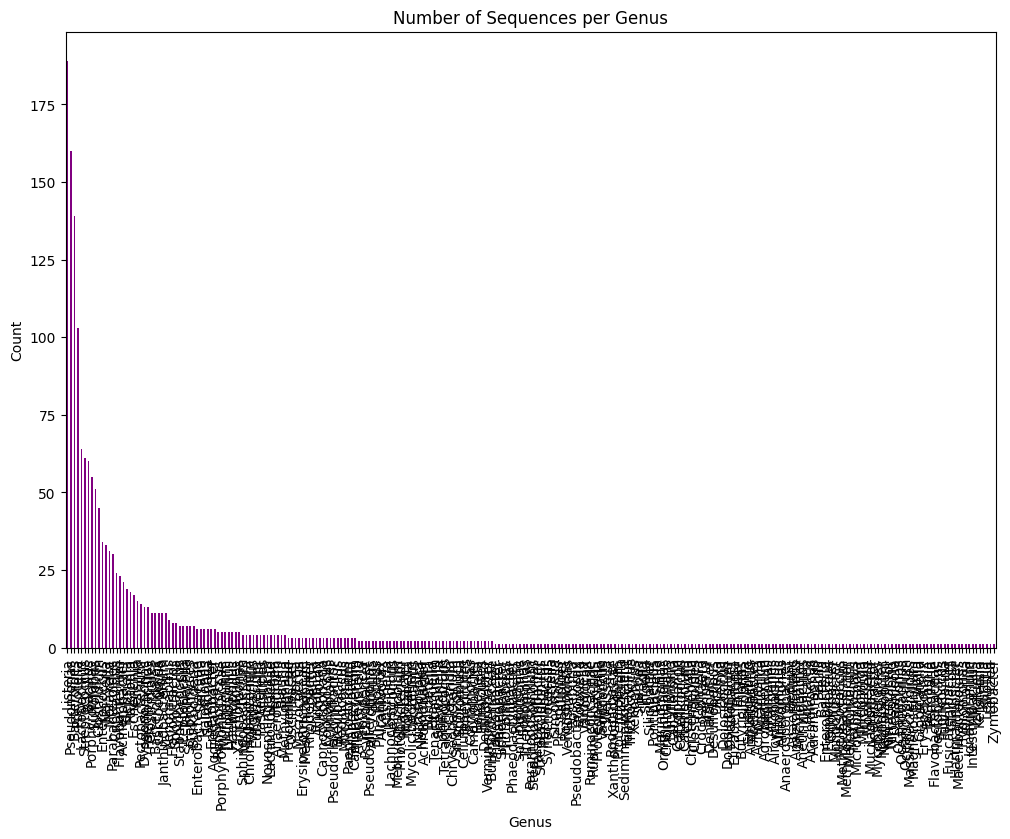

In [19]:
plt.figure(figsize=(12, 8))
df['Genus'].value_counts().plot(kind='bar', color='purple')
plt.title('Number of Sequences per Genus')
plt.xlabel('Genus')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

6. Relationship Between Sequence Size and Type

Plot Type: Violin Plot

This plot will help you see the distribution of sequence sizes for different types within families.

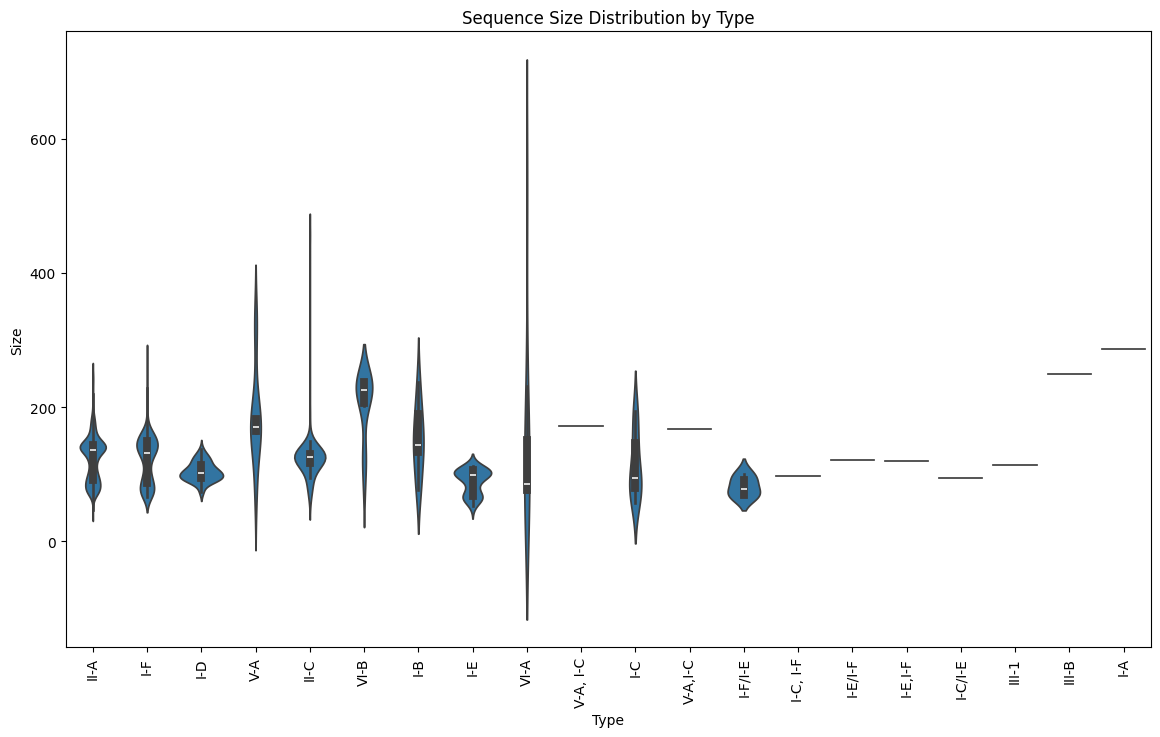

In [20]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.violinplot(x='Type', y='Size', data=df)
plt.title('Sequence Size Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Size')
plt.xticks(rotation=90)
plt.show()


7. Heatmap of Sequence Counts by Family and Type

Plot Type: Heatmap

This plot will show the count of sequences for each combination of family and type.

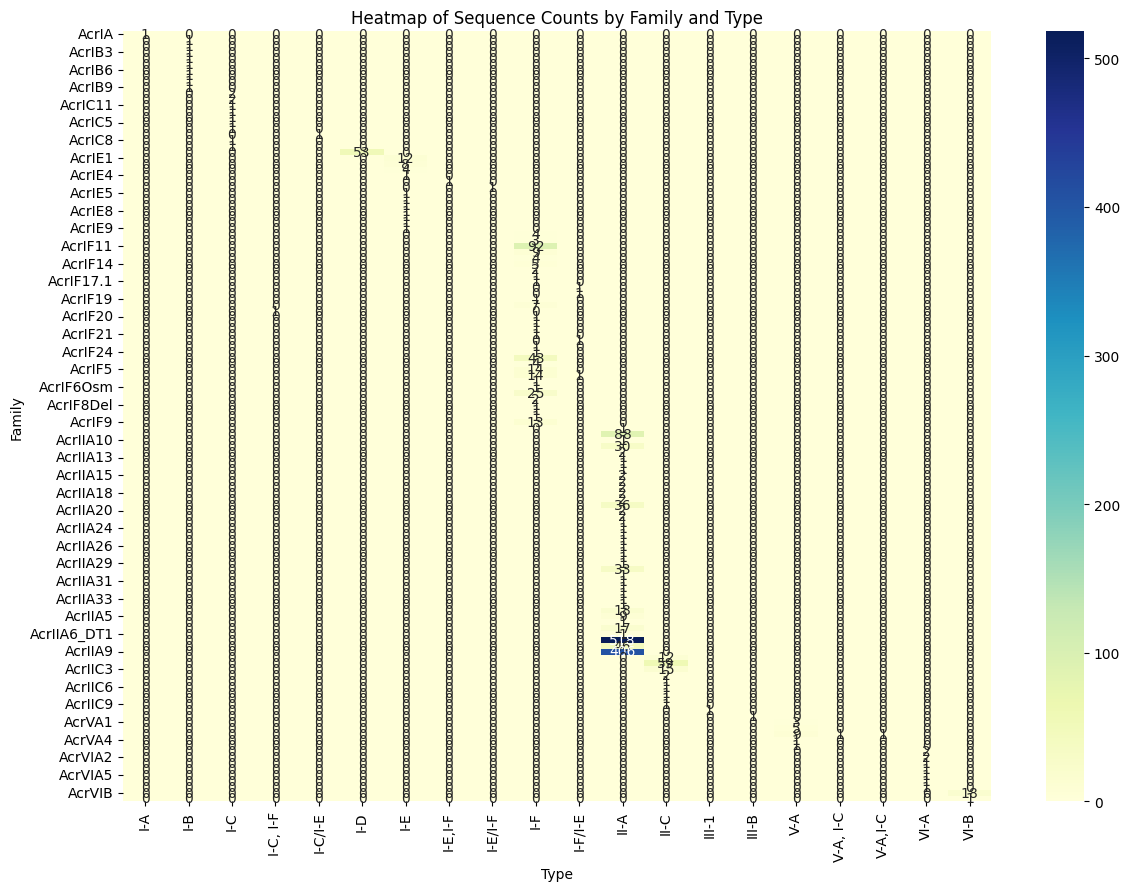

In [21]:
pivot_table = df.pivot_table(index='Family', columns='Type', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Sequence Counts by Family and Type')
plt.xlabel('Type')
plt.ylabel('Family')
plt.show()

### Protein Size by Host

In [14]:
df

,ID,Sequence,Organism,Family,Type,Size,Protein Acr,Genus
0,RGB60049.1,MSIYTDMIPAILLVNDPQDSLSGAPIENYVKVSNINVAIYKNDSFK...,Absiella sp.,AcrIIA8,II-A,105,Yes,Absiella
1,WP_103240931.1,MSCPFQAMEGGNGMERKMALREFCGRYRKGDFKGTERAVQIEAGWY...,Acetatifactor muris,AcrIIA11,II-A,195,Yes,Acetatifactor
2,WP_086652143.1,MELIHTSDEVIKKIHKDGTFDTFLFFSASKYLAGSVASRKHYTYKI...,Acetobacter cibinongensis,AcrIF11,I-F,179,Yes,Acetobacter
3,WP_012242545.1,MEKQQLLKDLIQAFNSGSFESSDVKVQIKAGWYDWFCKDSSLKNKT...,Acholeplasma laidlawii,AcrIIA11,II-A,144,Yes,Acholeplasma
4,WP_062681378.1,MQLFHTSPSEISTITSTGRFGSFLFFSARAYTMTAGEALVYSLEID...,Achromobacter denitrificans,AcrIF11,I-F,150,Yes,Achromobacter
...,...,...,...,...,...,...,...,...
1746,WP_011192267.1,MNFGQALQALKAGYKVARIGWNGKGMFLILISGTKDVEPCEGTPYA...,Yersinia pseudotuberculosis,AcrIIA7,II-A,146,Yes,Yersinia
1747,WP_050090803.1,MKLFHGSYSKTAPVIKVGAYALGSSDNIFDGLFASADIEIASSHGN...,Yersinia pseudotuberculosis,AcrIF11,I-F,162,Yes,Yersinia
1748,WP_071704514.1,MNFGEALEAVKSGKKIARSGWNGAAQFVIKAGGYTVSEARPGSDYA...,Yersinia ruckeri,AcrIIA7,II-A,88,Yes,Yersinia
1749,CFQ72446.1,MKLFHGSYSSTAPVMQIGQFTQVNGSENLYDGIFASDSMDSASSHG...,Yersinia similis,AcrIF11,I-F,141,Yes,Yersinia


## Genus

In [10]:
# Defining which Genus are GRAM-positive and GRAM-negative (this is a test function and is incomplete)

##### MANUALLY DEFINE GRAM POSITIVE AND GRAM NEGATIVE! Maybe try ChatGPT

def classify_gram_stain(genus_name):
    gram_positive_genera = ['Actinomyces', 'Bacillus', 'Clostridium', 'Lactobacillus', 'Streptococcus', 'Staphylococcus', 'Clostridioides', 'Listeria', 'Virgibacillus', 
                          'Streptomyces', 'Enterococcus', 'Eubacterium', 'Flavonifractor', 'Lactococcus', 'Ruminococcus']

    gram_negative_genera = ['Escherichia', 'Salmonella', 'Pseudomonas', 'Acinetobacter', 'Klebsiella', 'Proteus', 'Erwinia', 'Enterobacter', 'Yersinia', 'Xenorhabdus', 
                          'Xanthomonas', 'Vibrio', 'Verminephrobacter', 'Tannerella', 'Prevotella', 'Aggregatibacter', 'Bacteroides', 'Burkholderia', 'Cupriavidus', 
                          'Dysgonomonas', 'Flavobacterium', 'Haemophilus', 'Halomonas', 'Janthinobacterium', 'Moraxella', 'Ralstonia', 'Neisseria', 'Campylobacter']


    if genus_name in gram_positive_genera:
        return 'Gram-positive'
    elif genus_name in gram_negative_genera:
        return 'Gram-negative'
    else:
        return 'Unknown'

# Defines new column "Gram Stain"
df_genus_incidences['Gram Stain'] = df_genus_incidences['Genus'].apply(classify_gram_stain)


# Sets pandas display options to show all rows
pd.set_option('display.max_rows', None)

df_genus_incidences

# # Sets pandas display options back to default
# pd.set_option('display.max_rows', 20)

,Genus,Incidences,Gram Stain
0,Absiella,1,Unknown
1,Acetatifactor,1,Unknown
2,Acetobacter,1,Unknown
3,Acholeplasma,1,Unknown
4,Achromobacter,2,Unknown
5,Acidianus,2,Unknown
6,Acidovorax,3,Unknown
7,Acinetobacter,21,Gram-negative
8,Actinoplanes,3,Unknown
9,Aerococcus,2,Unknown
